In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2

In [2]:
img=cv2.imread("img.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

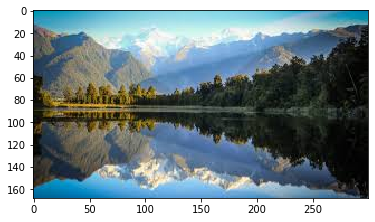

In [3]:
plt.imshow(img)
plt.show()

In [4]:
img.shape

(168, 300, 3)

In [5]:
all_pixels=img.reshape((-1,3)) 

In [6]:
all_pixels #so now this is our X we have to input in the K-means

array([[  0, 141, 176],
       [  0, 141, 176],
       [  1, 141, 177],
       ...,
       [ 14,  19,  23],
       [ 13,  20,  26],
       [ 76,  83,  89]], dtype=uint8)

In [7]:
all_pixels.shape

(50400, 3)

In [8]:
from sklearn.cluster import KMeans

In [9]:
k=9
km=KMeans(n_clusters=k)
#so it will take color from cluster and find color 

In [10]:
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
km.cluster_centers_ #center we have in decimal 
#so rgb(14.91798497,  17.94468754,  13.52473915)<== are some color as these ar some dominant points

array([[ 26.44532072, 143.13880126, 187.62302839],
       [ 43.57234767,  47.83953576,  39.55102813],
       [202.09673726, 227.37111238, 226.78286587],
       [147.13094008, 147.93827479, 137.74147727],
       [ 65.19242394,  80.86580697,  93.83699375],
       [126.21367652, 185.13585136, 216.06944867],
       [ 14.91798497,  17.94468754,  13.52473915],
       [ 91.39802097, 127.06025698, 163.98419731],
       [115.54440518, 107.55194346,  78.92414605]])

In [12]:
centers=np.array(km.cluster_centers_,dtype="uint") #so changing it in integers

In [13]:
#centers==>color
centers

array([[ 26, 143, 187],
       [ 43,  47,  39],
       [202, 227, 226],
       [147, 147, 137],
       [ 65,  80,  93],
       [126, 185, 216],
       [ 14,  17,  13],
       [ 91, 127, 163],
       [115, 107,  78]], dtype=uint32)

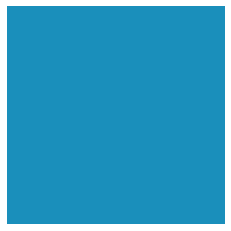

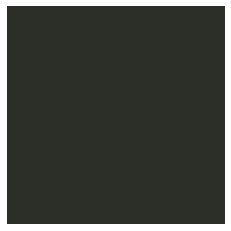

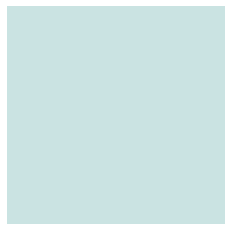

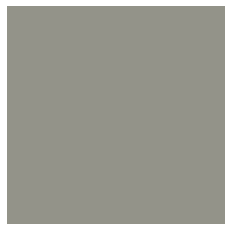

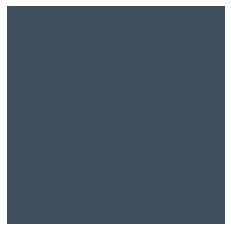

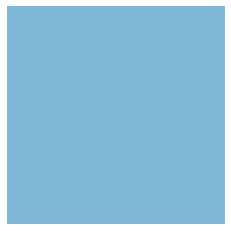

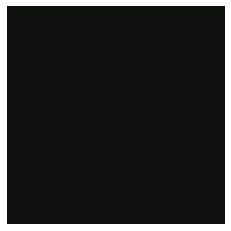

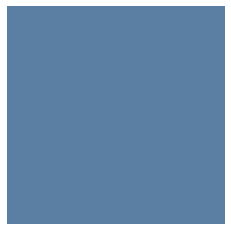

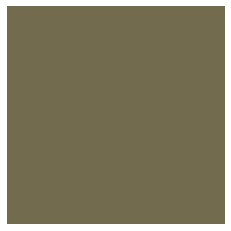

In [14]:
for c in centers:
    a=np.zeros((100,100,3)) #image 
    a[:,:,:]=c #so image will broadcast into a of the cluster center from img
    
    plt.imshow(a/255) #a should be in 0 and 1
    plt.axis("off") #removing axis 
    plt.show()

In [15]:
km.labels_#it will give cluster number associated with a cluster

array([0, 0, 0, ..., 6, 6, 4])

In [16]:
km.labels_.shape #showing number of cluster 

(50400,)

In [21]:
new_img = np.zeros((all_pixels.shape[0], 3), dtype="uint")


In [22]:
new_img

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint32)

In [23]:
new_img.shape
#you have same shape of image eariler of Pixels

(50400, 3)

In [24]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(all_pixels.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]
#in this we are iterating over all the points of image alloting all the color we have to new image
#colors are in center 

In [25]:
new_img


array([[ 26, 143, 187],
       [ 26, 143, 187],
       [ 26, 143, 187],
       ...,
       [ 14,  17,  13],
       [ 14,  17,  13],
       [ 65,  80,  93]], dtype=uint32)

In [26]:
new_img.shape

(50400, 3)

In [27]:
new_img = new_img.reshape((168, 300,3))


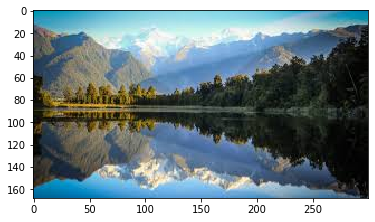

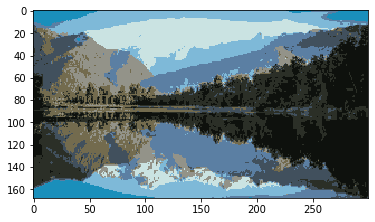

In [28]:
plt.imshow(img)
plt.show()
plt.imshow(new_img)
plt.show()

# DBSCAN 
as kmeans can only separate structured data not unstructered data